# Introduction

#### This analysis is based on the Online Retail Dataset, which captures transactions from an e-##commerce platform over a specific period. The dataset provides a wealth of information, ##including invoices, customers, products, and the corresponding date and time of each transaction.

### Key areas of analysis include:
#### Invoice Analysis: Understanding the distribution of sales across invoices
#### Customer Analysis: Segmenting customers based on their purchasing behavior and identifying high-value customers.
#### Product Analysis: Investigating the best-selling products and product profitability.
#### Date and Time Analysis: Examining sales trends over time, identifying peak shopping times.

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

## Reading Data

In [2]:
os.chdir("F:\AI&DS\ML\CustomerSegmentProject\\")

retail = pd.read_excel("Online Retail.xlsx")

retail_df = retail.copy()

retail_df.info()

retail_df.describe().round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


,Quantity,UnitPrice,CustomerID
count,541909.00,541909.00,406829.00
mean,9.55,4.61,15287.69
std,218.08,96.76,1713.60
min,-80995.00,-11062.06,12346.00
25%,1.00,1.25,13953.00
50%,3.00,2.08,15152.00
75%,10.00,4.13,16791.00
max,80995.00,38970.00,18287.00


## Data Cleaning

In [3]:
retail_df.shape

retail_df.isna().sum()

retail_df.dropna(inplace=True)

retail_df.shape

retail_df["InvoiceNo"].str.contains('C').count()

retail_df = retail_df[~retail_df["InvoiceNo"].str.contains('C', na=False)]

retail_df.shape

retail_df['TotalPrice'] = retail_df['Quantity'] * retail_df['UnitPrice']

retail_df.shape

retail_df = retail_df[retail_df["TotalPrice"] > 0]

retail_df = retail_df[retail_df["Country"] != "Israel"]

retail_df.shape

(397636, 9)

## Part 1 : Invoices Analysis

#### Construction of Invoices table 

In [4]:
retail_Invoice = retail_df.groupby('InvoiceNo').agg({'Description': lambda cnt: cnt.nunique(),
                                                     'Quantity': 'sum',
                                                     'TotalPrice': 'sum',
                                                     'Country': lambda name: name.unique(),
                                                     'CustomerID': lambda name: name.unique()})

retail_Invoice.columns = ["TotalProducts","TotalQuantity","TotalPrice",
                          "Country","CustomerID"]

#### Statistical Information

In [6]:
StaInfo = retail_Invoice['TotalProducts'].describe()
print("Minimum Number of items per invoice: ",StaInfo['min'])
print("Maximum Number of items per invoice: ",StaInfo['max'])
print("Average Number of items per invoice (Mean): ",StaInfo['mean'])
print("Average Number of items per invoice (Median): ",StaInfo['50%'])


StaInfo = retail_Invoice['TotalQuantity'].describe()
print("\nMinimum total quantity of items per invoice: ",StaInfo['min'])
print("Maximum total quantity of items per invoice: ",StaInfo['max'])
print("Average total quantity of items per invoice (Mean): ",StaInfo['mean'])
print("Average total quantity of items per invoice (Median): ",StaInfo['50%'])


StaInfo = retail_Invoice['TotalPrice'].describe()
print("\nMinimum total price for invoice: ",StaInfo['min'])
print("Maximum total price for invoice: ",StaInfo['max'])
print("Average total price for invoice (Mean): ",StaInfo['mean'])
print("Average total price for invoice (Median): ",StaInfo['50%'])

Minimum Number of items per invoice:  1.0
Maximum Number of items per invoice:  541.0
Average Number of items per invoice (Mean):  20.915096885626383
Average Number of items per invoice (Median):  15.0

Minimum total quantity of items per invoice:  1.0
Maximum total quantity of items per invoice:  80995.0
Average total quantity of items per invoice (Mean):  278.71571220381065
Average total quantity of items per invoice (Median):  155.0

Minimum total price for invoice:  0.38
Maximum total price for invoice:  168469.6
Average total price for invoice (Mean):  480.6059380363777
Average total price for invoice (Median):  303.03999999999996


#### Visulaize Box plot

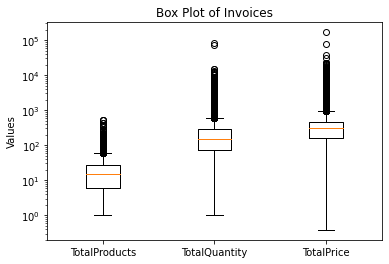

In [7]:
data_to_plot = [retail_Invoice['TotalProducts'],
                retail_Invoice['TotalQuantity'],
                retail_Invoice['TotalPrice']]

# Create a box plot
plt.boxplot(data_to_plot, labels=['TotalProducts','TotalQuantity','TotalPrice'])
#plt.ylim(0, 100)
plt.yscale('log')
plt.title('Box Plot of Invoices')
plt.ylabel('Values')
plt.show()

#### Construct table for product count per invoice
#### Example: How many invoices that have 3 products ? 

In [8]:
ProductsCount = retail_Invoice['TotalProducts'].value_counts()
InvoicesCount = ProductsCount.sort_index()
InvoicesCount.name = 'TotalInvoices'
InvoicesCount.head(10) # index ->  No of products per invoice, value -> No of invoices

1     1407
2      730
3      631
4      623
5      663
6      598
7      588
8      588
9      592
10     534
Name: TotalInvoices, dtype: int64

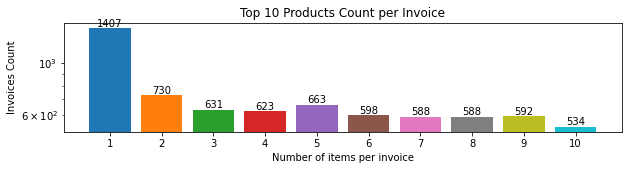

In [9]:
plt.figure(figsize=(10, 2))
for i in range(0,10):
    plt.bar(str(InvoicesCount.index[i]), InvoicesCount.values[i])
    plt.text(i, InvoicesCount.values[i]+10, InvoicesCount.values[i], ha = 'center')
plt.yscale('log')
plt.xlabel('Number of items per invoice')
plt.ylabel('Invoices Count')
plt.title('Top 10 Products Count per Invoice')
plt.show()

#### Top 10 Invoices According to its total price

In [10]:
Top10Invoices = retail_Invoice['TotalPrice'].nlargest(10)
Top10Invoices

InvoiceNo
581483    168469.60
541431     77183.60
556444     38970.00
567423     31698.16
556917     22775.93
572209     22206.00
567381     22104.80
563614     21880.44
550461     21535.90
572035     20277.92
Name: TotalPrice, dtype: float64

#### Construct frequency table for total price per invoice

In [14]:
TotalPriceTable = retail_Invoice['TotalPrice'].sort_values(ascending=True)

# TPF -> TotalPrice_Freqeuncy_Table
TPFGeneral = pd.cut(TotalPriceTable, 20)
TPFGeneral = TPFGeneral.value_counts().sort_index()
TPFGeneral.name = 'TotalInvoices'

(-168.089, 8423.841]        18473
(8423.841, 16847.302]          42
(16847.302, 25270.763]          8
(25270.763, 33694.224]          1
(33694.224, 42117.685]          1
(42117.685, 50541.146]          0
(50541.146, 58964.607]          0
(58964.607, 67388.068]          0
(67388.068, 75811.529]          0
(75811.529, 84234.99]           1
(84234.99, 92658.451]           0
(92658.451, 101081.912]         0
(101081.912, 109505.373]        0
(109505.373, 117928.834]        0
(117928.834, 126352.295]        0
(126352.295, 134775.756]        0
(134775.756, 143199.217]        0
(143199.217, 151622.678]        0
(151622.678, 160046.139]        0
(160046.139, 168469.6]          1
Name: TotalInvoices, dtype: int64


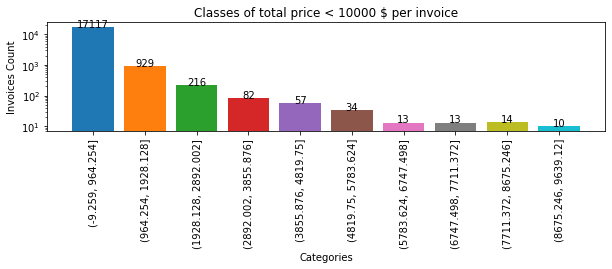

In [15]:
# Frequency Table for total price < 10000
TotalPrice10000 = TotalPriceTable[TotalPriceTable<=10000]
TPFx_10000 = pd.cut(TotalPrice10000, 10)
TPFx_10000 = TPFx_10000.value_counts().sort_index()
TPFx_10000.name = 'TotalInvoices'


plt.figure(figsize=(10, 2))

val = TPFx_10000.values[0]
label = TPFx_10000.index[0]
plt.bar(str(label), val)
plt.text(0, val, val, ha = 'center')

for i in range(1,10):
    val = TPFx_10000.values[i]
    label = TPFx_10000.index[i]
    plt.bar(str(label), val)
    plt.text(i, val, val, ha = 'center')

plt.xticks(rotation=90)
plt.yscale('log')
plt.xlabel('Categories')
plt.ylabel('Invoices Count')
plt.title('Classes of total price < 10000 $ per invoice')
plt.show()

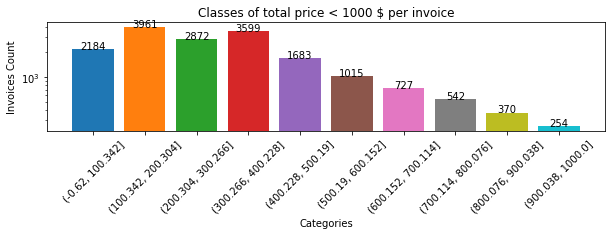

In [16]:
# Frequency Table for total price < 1000
TotalPrice1000 = TotalPriceTable[TotalPriceTable<=1000]
TPFx_1000 = pd.cut(TotalPrice1000, 10)
TPFx_1000 = TPFx_1000.value_counts().sort_index()
TPFx_10000.name = 'TotalInvoices'


plt.figure(figsize=(10, 2))

val = TPFx_1000.values[0]
label = TPFx_1000.index[0]
plt.bar(str(label), val)
plt.text(0, val, val, ha = 'center')

for i in range(1,10):
    val = TPFx_1000.values[i]
    label = TPFx_1000.index[i]
    plt.bar(str(label), val)
    plt.text(i, val, val, ha = 'center')

plt.xticks(rotation=45)
plt.yscale('log')
plt.xlabel('Categories')
plt.ylabel('Invoices Count')
plt.title('Classes of total price < 1000 $ per invoice')
plt.show()

#### Sorting countries by number of invoices  

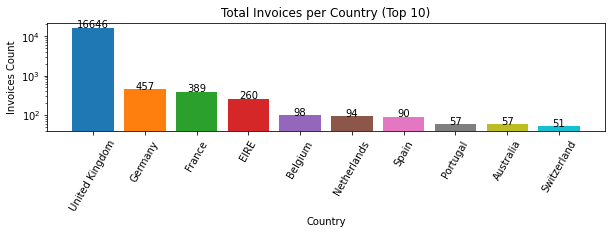

In [18]:
InvoicesByCountry = retail_Invoice['Country'].value_counts()

plt.figure(figsize=(10, 2))

for i in range(0,10):
    val = InvoicesByCountry.values[i]
    label = InvoicesByCountry.index[i]
    plt.bar(str(label), val)
    plt.text(i, val, val, ha = 'center')

plt.xticks(rotation=60)
plt.yscale('log')
plt.xlabel('Country')
plt.ylabel('Invoices Count')
plt.title('Total Invoices per Country (Top 10)')
plt.show()

## Part 2 : Products Analysis

#### Construction of Invoices table

In [19]:
retail_product = retail_df.groupby('Description').agg({'Quantity': 'sum',
                                                     'TotalPrice': 'sum',
                                                     'CustomerID': lambda cnt: cnt.nunique(),
                                                     'Country': lambda most: most.mode()})

retail_product['CountryNo'] = retail_df.groupby('Description').agg({'Country': lambda cnt: cnt.nunique()})

#### Statistical Information

In [23]:
MaxNoQuantity = retail_product['Quantity'].max()
HighSoldProduct_by_Quantity = retail_product[retail_product['Quantity'] == MaxNoQuantity]
print("The Maximum quantity sold was",MaxNoQuantity,"for the product '", 
      HighSoldProduct_by_Quantity.index[0],"'")


MaxTotalPrice = retail_product['TotalPrice'].max()
HighSoldProduct_by_Price = retail_product[retail_product['TotalPrice'] == MaxTotalPrice]
print("\nThe Highest Total Price for a product was",MaxTotalPrice,"for the product '", 
      HighSoldProduct_by_Price.index[0],"'")


MaxNoCustomers = retail_product['CustomerID'].max()
HighSoldProduct_by_Customers = retail_product[retail_product['CustomerID'] == MaxNoCustomers]
print("\nThe Maximum Number of customers bought a product was",MaxNoCustomers,
      "customers for the product '",HighSoldProduct_by_Customers.index[0],"'")


MaxNoCountry = retail_product['CountryNo'].max()
HighSoldProduct_by_Country = retail_product[retail_product['CountryNo'] == MaxNoCountry]
print("\nThe Maximum Number of countries bought a product was",MaxNoCountry,
      "countries for the product '",HighSoldProduct_by_Country.index[0],"'")

The Maximum quantity sold was 80995 for the product ' PAPER CRAFT , LITTLE BIRDIE '

The Highest Total Price for a product was 168469.6 for the product ' PAPER CRAFT , LITTLE BIRDIE '

The Maximum Number of customers bought a product was 879.0 customers for the product ' REGENCY CAKESTAND 3 TIER '

The Maximum Number of countries bought a product was 28 countries for the product ' REGENCY CAKESTAND 3 TIER '


#### Visulaize Box plot

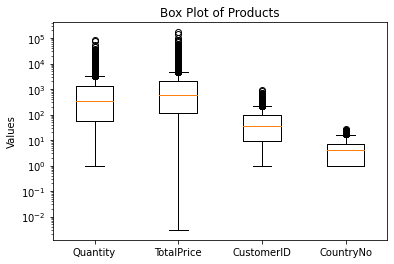

In [24]:
data_to_plot = [retail_product['Quantity'],
                retail_product['TotalPrice'],
                retail_product['CustomerID'],
                retail_product['CountryNo']]

# Create a box plot
plt.boxplot(data_to_plot, labels=['Quantity','TotalPrice','CustomerID','CountryNo'])
#plt.ylim(0, 100)
plt.yscale('log')
plt.title('Box Plot of Products')
plt.ylabel('Values')
plt.show()

#### Sorting the products according to the quantity 

In [26]:
Top_10_products_by_quantity = retail_product['Quantity'].sort_values(ascending = False)

Top_10_products_by_quantity.head(10)

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77904
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
JUMBO BAG RED RETROSPOT               46181
WHITE HANGING HEART T-LIGHT HOLDER    36723
ASSORTED COLOUR BIRD ORNAMENT         35362
PACK OF 72 RETROSPOT CAKE CASES       33669
POPCORN HOLDER                        30907
RABBIT NIGHT LIGHT                    27202
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64

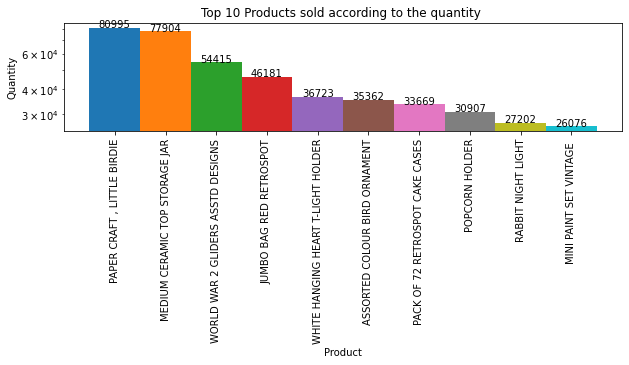

In [27]:
plt.figure(figsize=(10, 2))

for i in range(0,10):
    val = Top_10_products_by_quantity.values[i]
    label = Top_10_products_by_quantity.index[i]
    plt.bar(str(label), val, colors[i])
    plt.text(i, val, val, ha = 'center')

plt.xticks(rotation=90)
plt.yscale('log')
plt.xlabel('Product')
plt.ylabel('Quantity')
plt.title('Top 10 Products sold according to the quantity ')
plt.show()

#### Sorting the products according to the price

In [28]:
Top_10_products_by_price = retail_product['TotalPrice'].sort_values(ascending = False)

Top_10_products_by_price.head(10)

Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142041.85
WHITE HANGING HEART T-LIGHT HOLDER    100442.25
JUMBO BAG RED RETROSPOT                85220.78
MEDIUM CERAMIC TOP STORAGE JAR         81401.73
POSTAGE                                77803.96
PARTY BUNTING                          68839.38
ASSORTED COLOUR BIRD ORNAMENT          56580.34
Manual                                 53779.93
RABBIT NIGHT LIGHT                     51346.20
Name: TotalPrice, dtype: float64

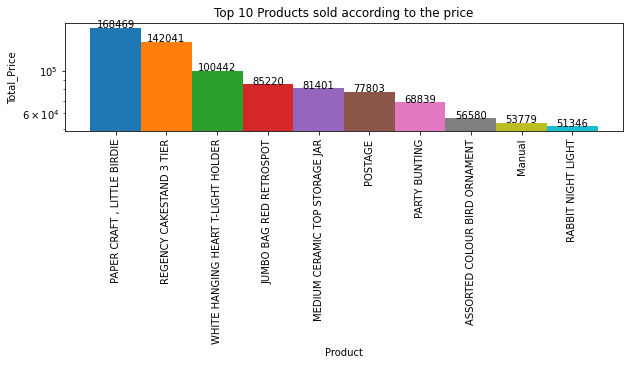

In [29]:
plt.figure(figsize=(10, 2))

for i in range(0,10):
    val = Top_10_products_by_price.values[i]
    label = Top_10_products_by_price.index[i]
    plt.bar(str(label), val, colors[i])
    plt.text(i, val, int(val), ha = 'center')

plt.xticks(rotation=90)
plt.yscale('log')
plt.xlabel('Product')
plt.ylabel('Total_Price')
plt.title('Top 10 Products sold according to the price')
plt.show()

#### Sorting the products according to the number of customers

In [30]:
Top_10_products_by_customers = retail_product['CustomerID'].sort_values(ascending = False)

Top_10_products_by_customers.head(10)

Description
REGENCY CAKESTAND 3 TIER              879.0
WHITE HANGING HEART T-LIGHT HOLDER    855.0
PARTY BUNTING                         707.0
ASSORTED COLOUR BIRD ORNAMENT         678.0
SET OF 3 CAKE TINS PANTRY DESIGN      639.0
JUMBO BAG RED RETROSPOT               635.0
PACK OF 72 RETROSPOT CAKE CASES       634.0
PAPER CHAIN KIT 50'S CHRISTMAS        613.0
NATURAL SLATE HEART CHALKBOARD        587.0
BAKING SET 9 PIECE RETROSPOT          580.0
Name: CustomerID, dtype: float64

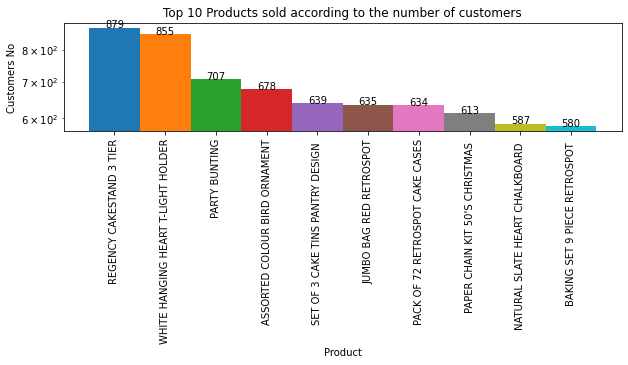

In [31]:
plt.figure(figsize=(10, 2))

for i in range(0,10):
    val = Top_10_products_by_customers.values[i]
    label = Top_10_products_by_customers.index[i]
    plt.bar(str(label), val, colors[i])
    plt.text(i, val, int(val), ha = 'center')

plt.xticks(rotation=90)
plt.yscale('log')
plt.xlabel('Product')
plt.ylabel('Customers No')
plt.title('Top 10 Products sold according to the number of customers')
plt.show()

#### Top Products sold in a certain country

In [38]:
desired_country = 'Australia'   # you can change it to another country

products_in_desired_country = retail_df[retail_df['Country'] == desired_country ]

Grouped_products_in_desired_country = products_in_desired_country.groupby('Description').agg({
                                     'Quantity': 'sum','TotalPrice': 'sum', 'CustomerID': lambda cnt: cnt.nunique()})
                                     

products_in_desired_country_by_quantity = Grouped_products_in_desired_country['Quantity'].sort_values(ascending = False)

products_in_desired_country_by_price = Grouped_products_in_desired_country['TotalPrice'].sort_values(ascending = False)

products_in_desired_country_by_customers = Grouped_products_in_desired_country['CustomerID'].sort_values(ascending = False)

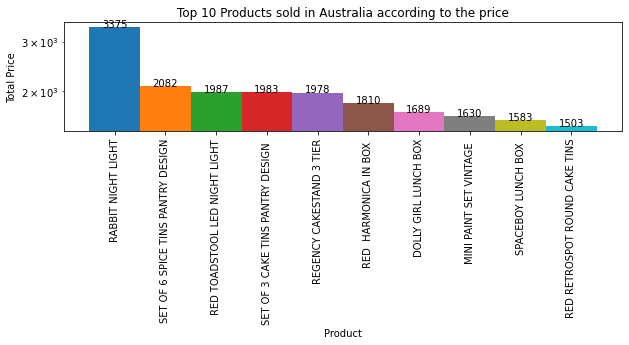

In [39]:
plt.figure(figsize=(10, 2))   

for i in range(0,10):
    val = products_in_desired_country_by_price.values[i]
    label = products_in_desired_country_by_price.index[i]
    plt.bar(str(label), val, colors[i])
    plt.text(i, val, int(val), ha = 'center')

plt.xticks(rotation=90)
plt.yscale('log')
plt.xlabel('Product')
plt.ylabel('Total Price')
plt.title(f'Top 10 Products sold in {desired_country} according to the price')
plt.show()